<div align="center">
  <h1><b>Penyisihan Datavidia 9</b></h1>
  <p><b>Supercalifragilisticexpialidocious - Beras Premium</b></p>
  <span style="font-size: 12px;">Author: <a href="https://github.com/ChristellaCindy">Christella Cindy</a>, <a href="https://github.com/Frederickkrisna">Frederick Krisna</a>, and <a href="https://github.com/williamtheodoruswijaya">William Theodorus</a></span>
</div>
<hr>

### 1. Import Libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

- `Evaluation`

In [2]:
def mape(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
    y_true (array-like): True values.
    y_pred (array-like): Predicted values.

    Returns:
    float: The calculated MAPE.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true))

### 2. Load Dataset
---

In [3]:
path = "/Users/Hendra Wijaya/OneDrive/Documents/Binus/Datavidia/penyisihan-datavidia/comodity-price-prediction-penyisihan-arkavidia-9/Harga Bahan Pangan"
files = [
    "Bawang Merah", "Bawang Putih Bonggol", "Beras Medium", "Beras Premium",
    "Cabai Merah Keriting", "Cabai Rawit Merah", "Daging Ayam Ras",
    "Daging Sapi Murni", "Gula Konsumsi", "Minyak Goreng Curah",
    "Minyak Goreng Kemasan Sederhana", "Telur Ayam Ras", "Tepung Terigu (Curah)"
]

# Load data
df_list = {}
for file in files:
    df = pd.read_csv(f"{path}/train/{file}.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df_list[file] = df

# For Training purpose, we use only Bawang Merah since all training have the same approach
df = df_list["Beras Premium"]
df.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,12080.0,11500.0,11210.0,11350.0,11250.0,12660.0,11230.0,12090.0,11580.0,11610.0,...,14810.0,14300.0,11320.0,10930.0,11680.0,11890.0,12170.0,13410.0,11540.0,12720.0
2022-01-02,12020.0,11500.0,11210.0,11400.0,11250.0,12660.0,11290.0,11980.0,11600.0,11560.0,...,15310.0,14370.0,11430.0,10920.0,11390.0,11870.0,12240.0,13340.0,11630.0,12710.0
2022-01-03,11990.0,11500.0,11290.0,11370.0,11210.0,12390.0,11230.0,12130.0,11620.0,11680.0,...,15000.0,14340.0,11350.0,10890.0,11630.0,11730.0,12070.0,13240.0,11510.0,12510.0
2022-01-04,12050.0,11630.0,11210.0,11410.0,11210.0,12390.0,11330.0,12090.0,11610.0,11630.0,...,15000.0,14460.0,11300.0,10920.0,11630.0,11720.0,12070.0,13310.0,11460.0,12450.0
2022-01-05,12180.0,11670.0,11250.0,11590.0,11050.0,12390.0,11350.0,12130.0,11610.0,11650.0,...,14820.0,14470.0,11350.0,10890.0,11630.0,11860.0,11980.0,13300.0,11490.0,12430.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-01-01 to 2024-09-30
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aceh                       967 non-null    float64
 1   Bali                       968 non-null    float64
 2   Banten                     967 non-null    float64
 3   Bengkulu                   967 non-null    float64
 4   DI Yogyakarta              968 non-null    float64
 5   DKI Jakarta                967 non-null    float64
 6   Gorontalo                  969 non-null    float64
 7   Jambi                      966 non-null    float64
 8   Jawa Barat                 967 non-null    float64
 9   Jawa Tengah                970 non-null    float64
 10  Jawa Timur                 969 non-null    float64
 11  Kalimantan Barat           968 non-null    float64
 12  Kalimantan Selatan         967 non-null    float64
 13  Kalimantan Tengah          968

In [5]:
df.describe()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
count,967.000000,968.000000,967.000000,967.000000,968.000000,967.000000,969.000000,966.000000,967.000000,970.000000,...,967.000000,969.000000,965.000000,970.000000,970.000000,968.000000,970.000000,969.000000,966.000000,968.000000
mean,13178.976215,13597.283058,13024.033092,13471.416753,12975.650826,13747.125129,13337.770898,13651.987578,13149.803516,13208.278351,...,16466.763185,14979.091847,12902.466321,12739.701031,13600.876289,13295.619835,13580.762887,15652.476780,12998.975155,13815.392562
std,1147.989099,1599.032720,1596.940356,1589.512263,1471.419406,1680.717955,1814.560708,1236.444587,1460.311186,1458.632686,...,1362.851478,939.534680,1394.050313,1561.409822,1673.454728,1453.542770,1396.184701,1476.423482,1176.380805,1140.158125
min,11570.000000,11000.000000,11050.000000,11080.000000,10730.000000,11910.000000,10920.000000,11790.000000,11470.000000,10630.000000,...,14640.000000,13210.000000,10830.000000,10590.000000,11390.000000,11200.000000,11610.000000,13020.000000,11300.000000,12250.000000
25%,12180.000000,11992.500000,11350.000000,12080.000000,11460.000000,12385.000000,11310.000000,12635.000000,11705.000000,11760.000000,...,15240.000000,14350.000000,11480.000000,11010.000000,11910.000000,11780.000000,12112.500000,15080.000000,11870.000000,12610.000000
50%,12720.000000,13270.000000,12700.000000,12910.000000,12600.000000,12730.000000,13350.000000,13290.000000,12600.000000,12810.000000,...,16050.000000,14820.000000,12630.000000,12560.000000,13315.000000,13280.000000,13575.000000,15680.000000,12700.000000,13565.000000
75%,14480.000000,15000.000000,14505.000000,15130.000000,14230.000000,15490.000000,14710.000000,14860.000000,14525.000000,14670.000000,...,17980.000000,16040.000000,14260.000000,14465.000000,14870.000000,14430.000000,14797.500000,16940.000000,14120.000000,15010.000000
max,14870.000000,16990.000000,16740.000000,16230.000000,16490.000000,17790.000000,18010.000000,15870.000000,16670.000000,16420.000000,...,19070.000000,16560.000000,16550.000000,15900.000000,17390.000000,20000.000000,16880.000000,17650.000000,15330.000000,15550.000000


### 3. EDA + Data Preprocessing

> **3.1 Exploratory Data Analysis**

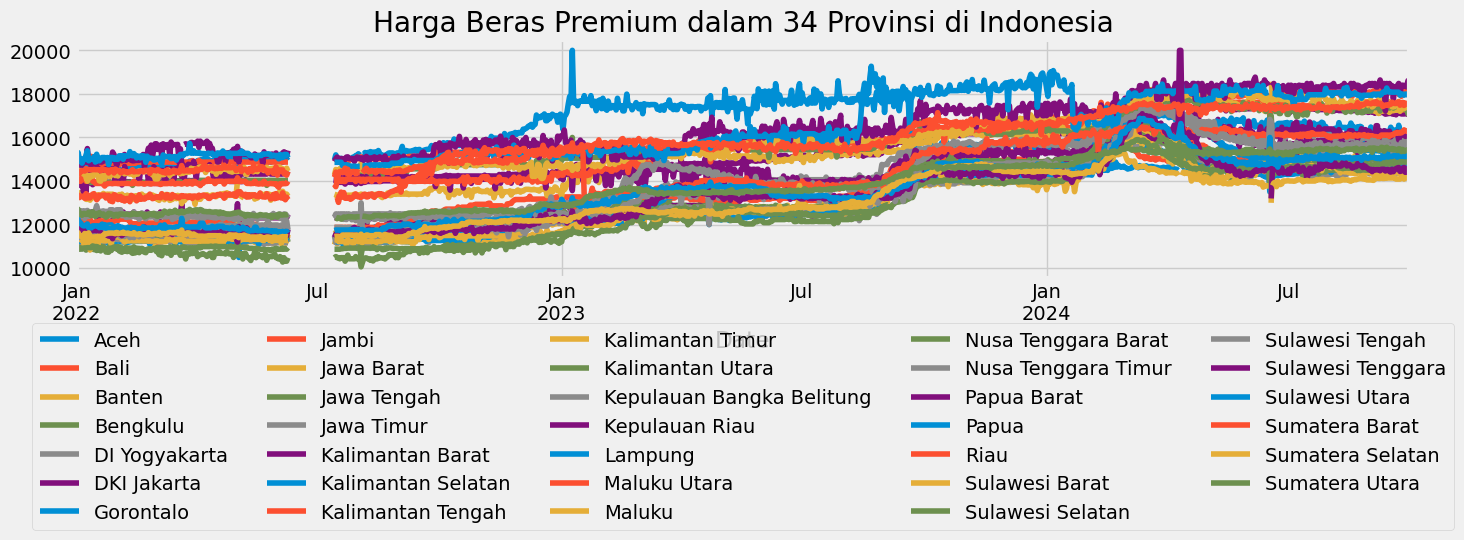

In [6]:
df.plot(figsize=(15, 6))
plt.title('Harga Beras Premium dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

**Insight:**

Berdasarkan visualisasi yang kita lihat, harga bawang merah memiliki missing data pada Juli 2023. Sehingga kita akan coba melakukan sedikit pendekatan dengan melakukan interpolasi data untuk mengisi kekosongan data ini.

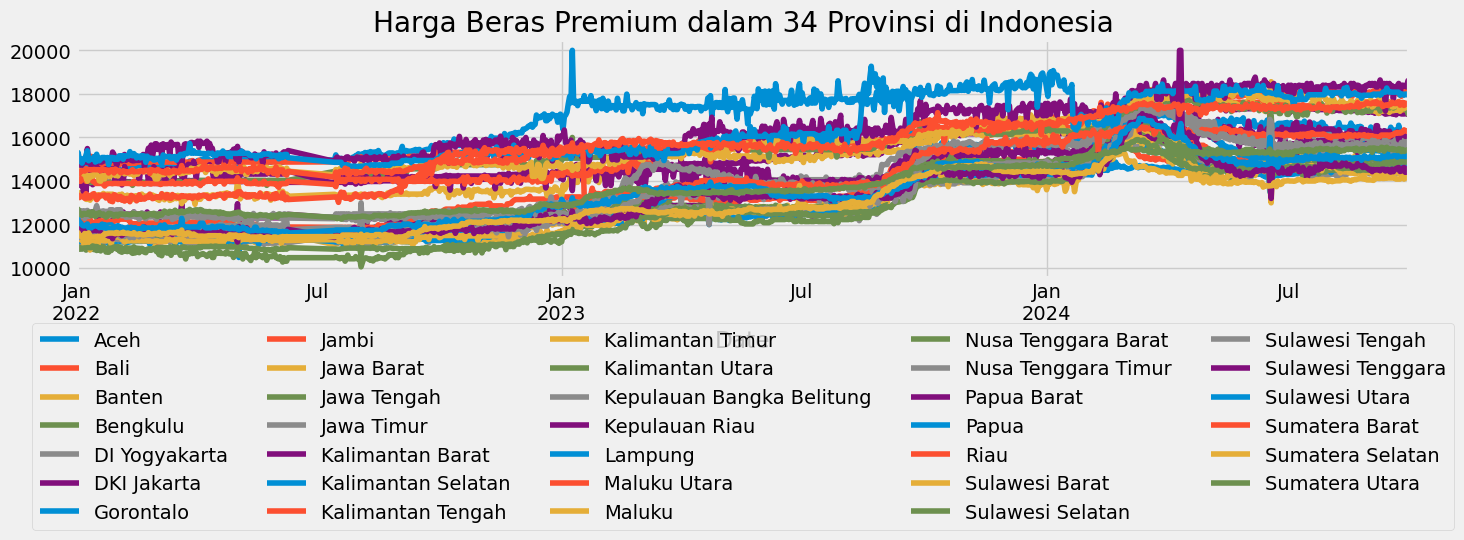

In [7]:
df.interpolate(method='linear', inplace=True)
df.plot(figsize=(15, 6))
plt.title('Harga Beras Premium dalam 34 Provinsi di Indonesia')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

Sekarang, coba kita rapikan visualisasinya dengan memperkecil range tanggal kita. Misal, dalam tahun waktu seminggu, kira-kira bagaimana fluktuasi harga bahan pangannya.

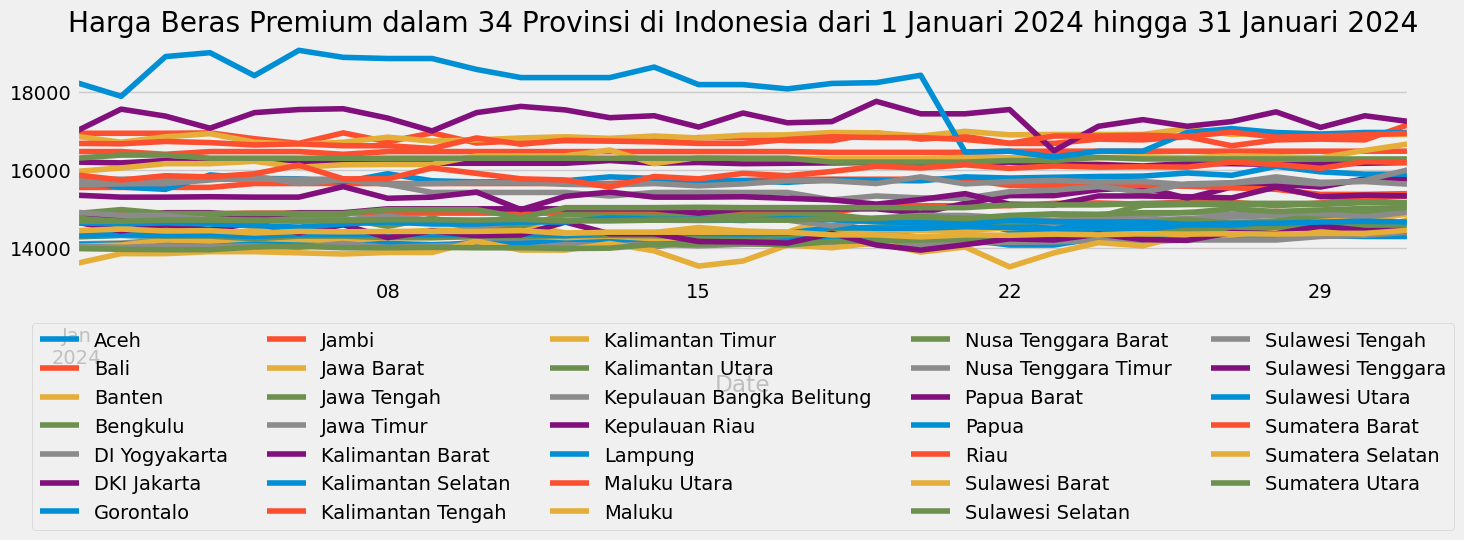

In [8]:
df_2024 = df[(df.index >= '2024-01-01') & (df.index <= '2024-01-31')]
df_2024.plot(figsize=(15, 6), lw = 4)
plt.title('Harga Beras Premium dalam 34 Provinsi di Indonesia dari 1 Januari 2024 hingga 31 Januari 2024')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()
plt.show()

> 3.2 **Feature Creation**: menambahkan kolom tambahan

Notes: fungsi ini akan dijalankan setelah proses `train_test_split`

In [9]:
def create_features(df):
    """
    Create time series features from datetime index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

<Figure size 1500x600 with 0 Axes>

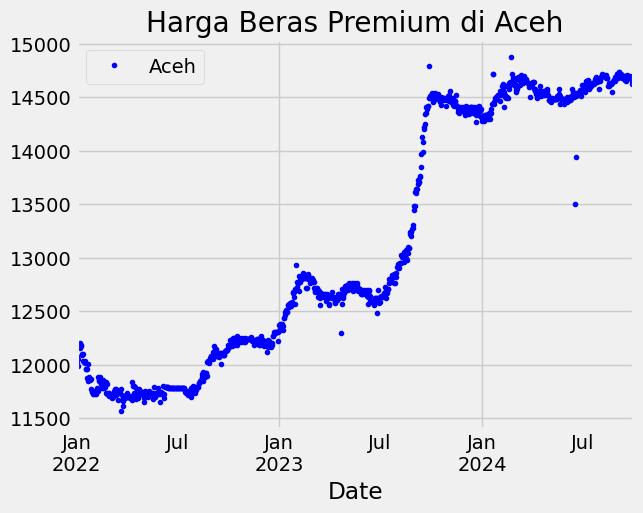

In [10]:
# Take 'Aceh' data only for training only
df_aceh = df[['Aceh']]

plt.figure(figsize=(15, 6))
df_aceh.plot(style='.', 
             color='blue', 
             title='Harga Beras Premium di Aceh')
plt.show()

### 4. Train/Test Split

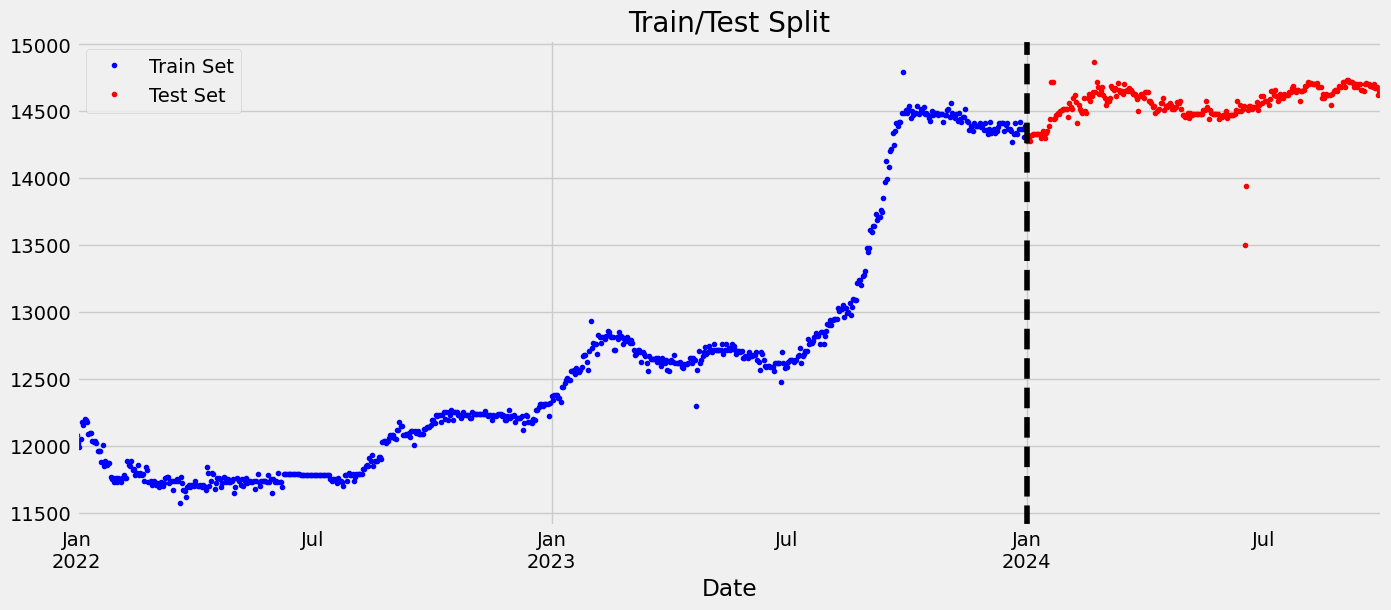

In [11]:
train_aceh = df_aceh.loc[df.index < '2024-01-01']
test_aceh = df_aceh.loc[df.index >= '2024-01-01']

fig, ax = plt.subplots(figsize=(15, 6))
train_aceh.plot(ax=ax, color='blue', style='.', lw=2)
test_aceh.plot(ax=ax, color='red', style='.', lw=2)
plt.title('Train/Test Split')
ax.axvline('01-01-2024', color='black', linestyle='--')
ax.legend(['Train Set', 'Test Set'])
plt.show()

### 5. **Features Engineering**: Memahami target relationship

In [12]:
# Sebelum itu, kita akan menambahkan fitur-fitur waktu ke dalam data
df_aceh = create_features(df_aceh)
df_aceh.head()

,Aceh,hour,dayofweek,quarter,month,year,dayofyear
Date,,,,,,,
2022-01-01,12080.0,0,5,1,1,2022,1
2022-01-02,12020.0,0,6,1,1,2022,2
2022-01-03,11990.0,0,0,1,1,2022,3
2022-01-04,12050.0,0,1,1,1,2022,4
2022-01-05,12180.0,0,2,1,1,2022,5


- **Visualize features**

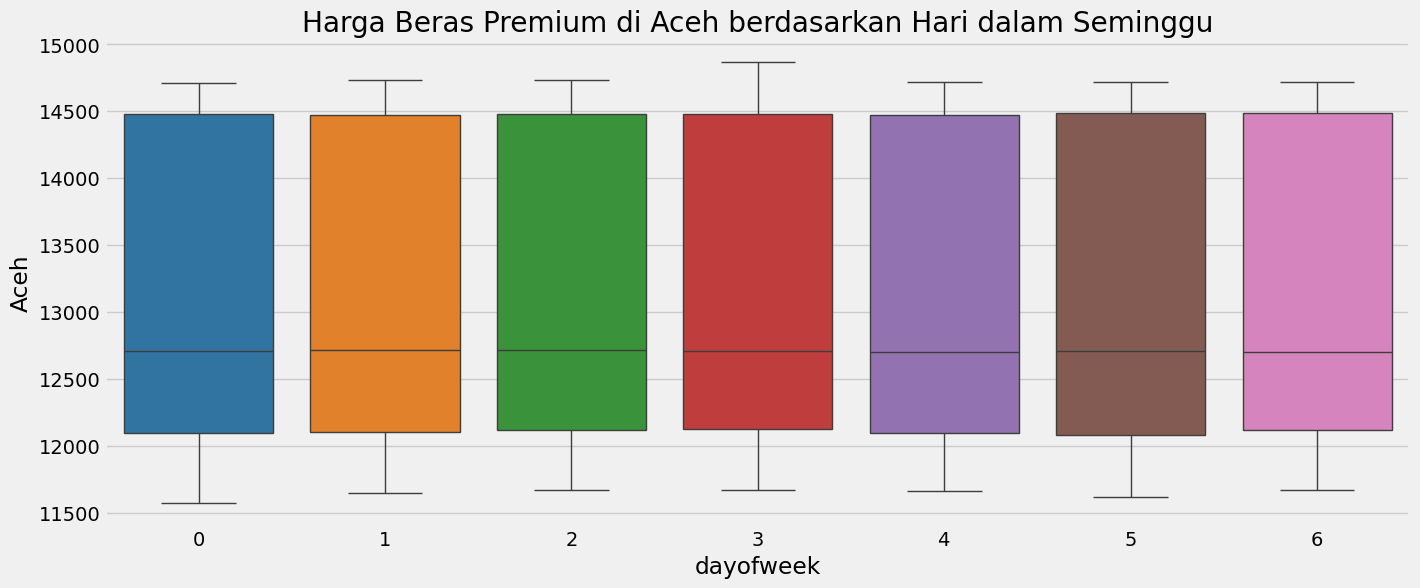

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='dayofweek', y='Aceh', palette=color_pal)
plt.title('Harga Beras Premium di Aceh berdasarkan Hari dalam Seminggu')
plt.show()

**Insight**: Dari sini kita bisa menyimpulkan bahwa peningkatan harga dalam 1 minggu cenderung sangat sedikit atau mungkin bisa dibilang tidak ada sama sekali.

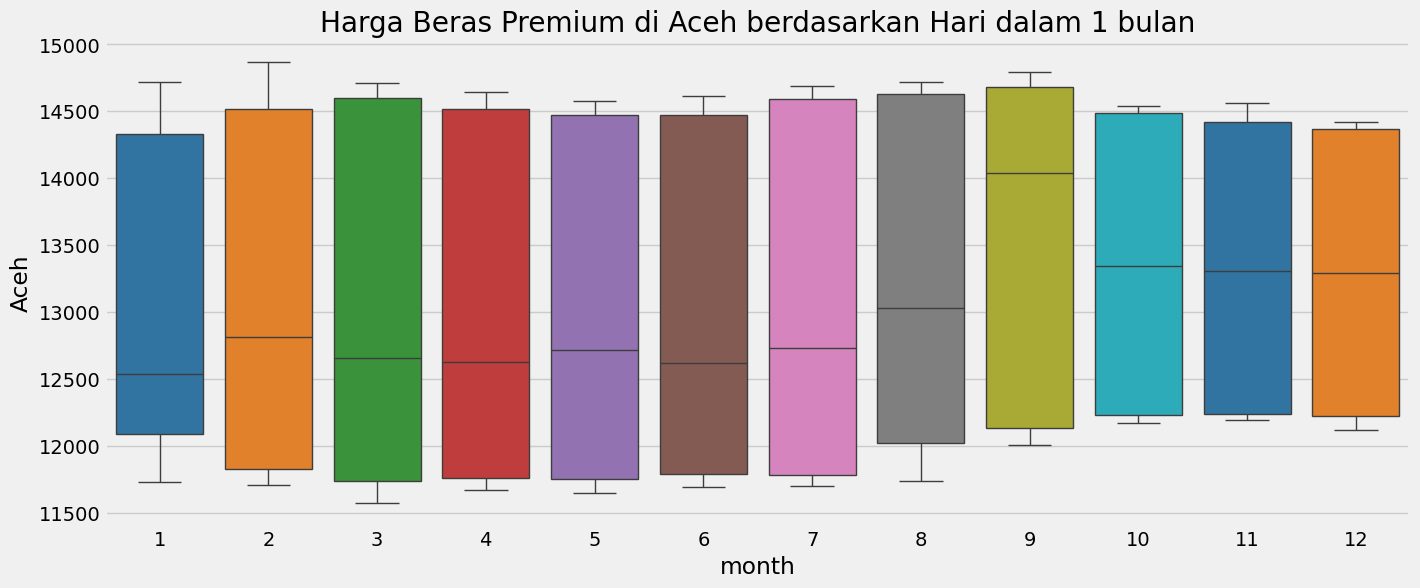

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_aceh, x='month', y='Aceh', palette=color_pal)
plt.title('Harga Beras Premium di Aceh berdasarkan Hari dalam 1 bulan')
plt.show()

**Insight**: Sementara dalam hitungan bulan, kita bisa melihat tingkatan-tingkatan yang terjadi, yang membuat grafik dari time series ini berupa **Seasonal**

### 6. Modelling

- 6.1 Data Splitting

In [15]:
train_aceh = create_features(train_aceh)
test_aceh = create_features(test_aceh)

features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
target = 'Aceh'

# Reassign X_train, X_test, y_train, y_test
X_train = train_aceh[features]
y_train = train_aceh[target]
X_test = test_aceh[features]
y_test = test_aceh[target]

- 6.2 Modelling

- **XGBoost Model Parameter:**
    - n_estimators: Banyaknya pohon yang akan dia buat.
    - early_stopping_rounds: Total epoch yang akan dia hentikan ketika model sudah mulai overfit.
    - learning_rate: kecepatan model belajar `(semakin cepat, maka semakin cepat model belajar namun semakin gampang pula dia lupa dengan pola-pola yang sudah dia pelajari)`

In [16]:
MODEL_xgb = xgb.XGBRegressor(n_estimators=1000,
                       early_stopping_rounds=50,
                       learning_rate=0.001)
MODEL_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:878.31138	validation_1-rmse:1974.65310
[100]	validation_0-rmse:796.09000	validation_1-rmse:1948.33097
[200]	validation_0-rmse:721.64685	validation_1-rmse:1925.39285
[300]	validation_0-rmse:654.22736	validation_1-rmse:1905.17542
[400]	validation_0-rmse:593.18704	validation_1-rmse:1887.46870
[500]	validation_0-rmse:537.92010	validation_1-rmse:1871.93627
[600]	validation_0-rmse:487.88666	validation_1-rmse:1858.27920
[700]	validation_0-rmse:442.59310	validation_1-rmse:1846.25213
[800]	validation_0-rmse:401.59662	validation_1-rmse:1835.66484
[900]	validation_0-rmse:364.49800	validation_1-rmse:1826.31998
[999]	validation_0-rmse:331.24771	validation_1-rmse:1818.15551


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

- 6.3 Feature Importances: Mengetahui fitur apa yang sebenarnya paling berpengaruh terhadap data.

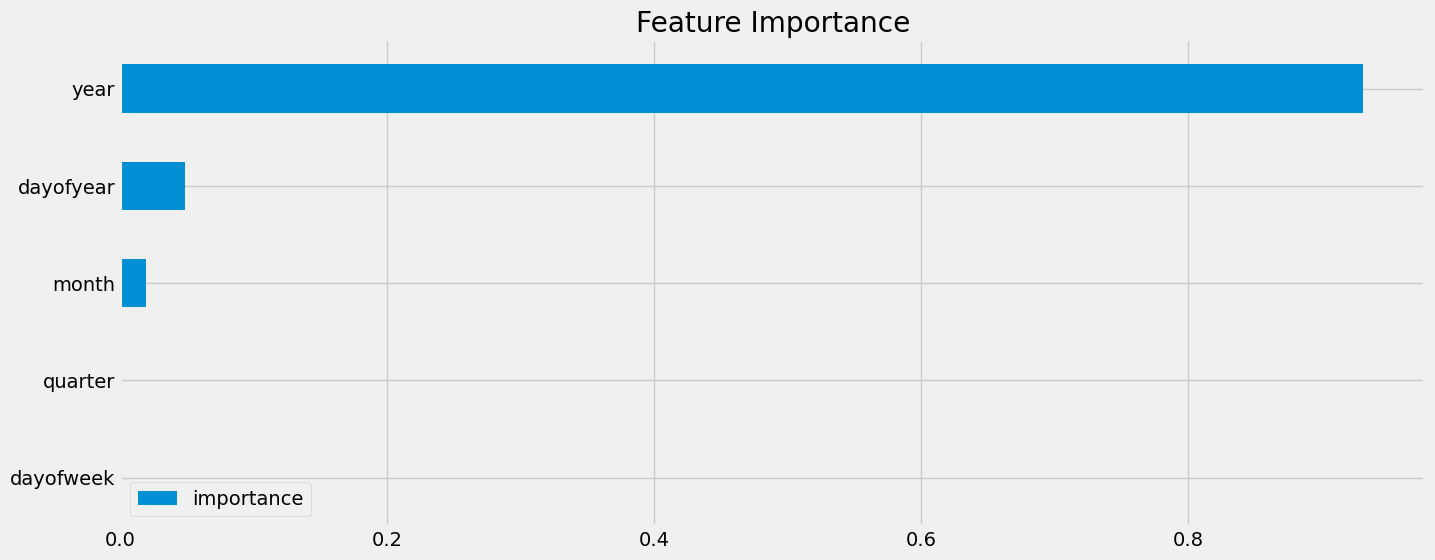

In [17]:
fi = pd.DataFrame(data=MODEL_xgb.feature_importances_,
                  index=MODEL_xgb.feature_names_in_,
                  columns=['importance'])

fi.sort_values('importance').plot(kind='barh', figsize=(15, 6))
plt.title('Feature Importance')
plt.show()

### 7. Evaluation

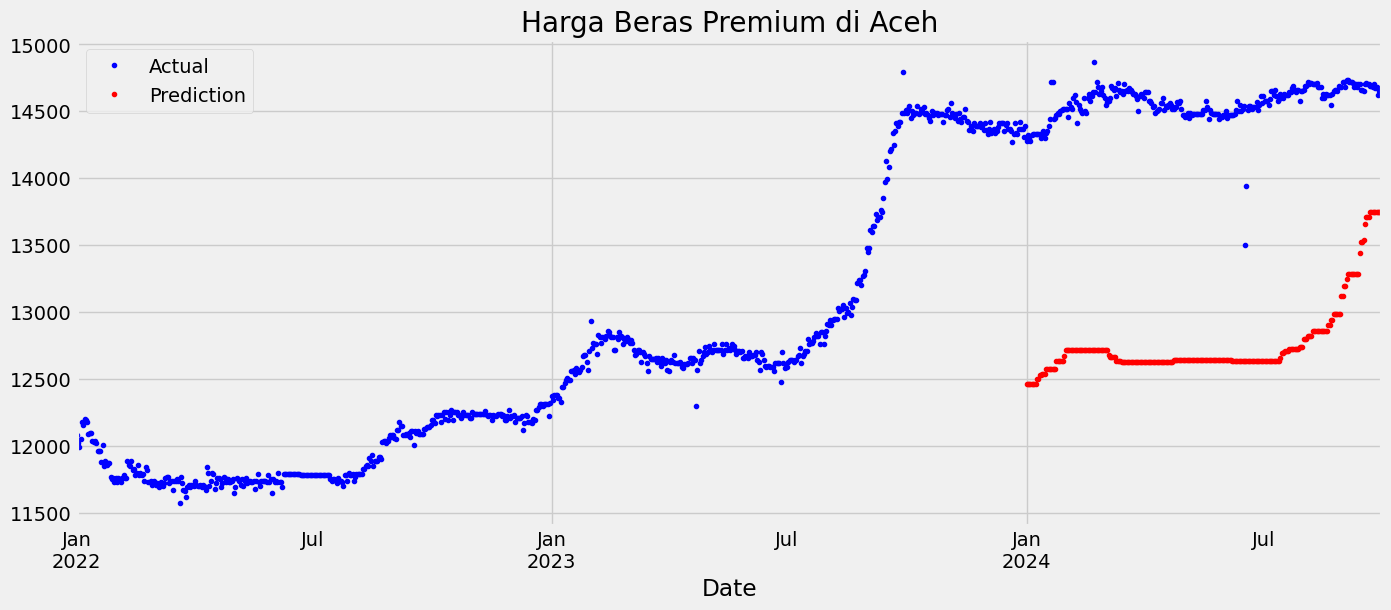

In [18]:
test_aceh['prediction'] = MODEL_xgb.predict(X_test)

df_aceh = df_aceh.merge(test_aceh[['prediction']], how='left', left_index=True, right_index=True)

plt.figure(figsize=(15, 6))
df_aceh['Aceh'].plot(color='blue', lw=2, style='.') # Actual
df_aceh['prediction'].plot(color='red', lw=2, style='.') # Prediction
plt.title('Harga Beras Premium di Aceh')
plt.legend(['Actual', 'Prediction'])
plt.show()

In [19]:
mape_aceh_score = mape(test_aceh['Aceh'], test_aceh['prediction'])
print(f'MAPE Score: {mape_aceh_score.round(2)}')

MAPE Score: 0.12


---
### 8. Apply for other 34 provinces

In [20]:
def train_predict_evaluate(df, province, cutoff_date='2024-01-01'):
    df = df.copy()

    # interpolasi NaN data
    df.interpolate(method='linear', inplace=True)

    # Tambahkan fitur-fitur waktu
    df = create_features(df)

    # Split data
    train = df.loc[df.index < cutoff_date]
    test = df.loc[df.index >= cutoff_date]

    # Features dan Target
    features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear']
    target = province

    # Reassign X_train, X_test, y_train, y_test
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]

    # Model
    model = xgb.XGBRegressor(n_estimators=1000,
                             early_stopping_rounds=50,
                             learning_rate=0.001)
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=100)
    
    # Prediction
    test['prediction'] = model.predict(X_test)
    mape_score = mape(test[target], test['prediction'])

    return model, mape_score, test

In [21]:
models = {}
mape_scores = {}

provinces = df.columns
for province in provinces:
    print(f"Training model untuk provinsi: {province}")

    model, mape_score, test = train_predict_evaluate(df, province)

    models[province] = model
    mape_scores[province] = mape_score

    print(f"MAPE Score: {mape_score.round(2)}")

Training model untuk provinsi: Aceh
[0]	validation_0-rmse:878.31138	validation_1-rmse:1974.65310


[100]	validation_0-rmse:796.09000	validation_1-rmse:1948.33097
[200]	validation_0-rmse:721.64685	validation_1-rmse:1925.39285
[300]	validation_0-rmse:654.22736	validation_1-rmse:1905.17542
[400]	validation_0-rmse:593.18704	validation_1-rmse:1887.46870
[500]	validation_0-rmse:537.92010	validation_1-rmse:1871.93627
[600]	validation_0-rmse:487.88666	validation_1-rmse:1858.27920
[700]	validation_0-rmse:442.59310	validation_1-rmse:1846.25213
[800]	validation_0-rmse:401.59662	validation_1-rmse:1835.66484
[900]	validation_0-rmse:364.49800	validation_1-rmse:1826.31998
[999]	validation_0-rmse:331.24771	validation_1-rmse:1818.15551
MAPE Score: 0.12
Training model untuk provinsi: Bali
[0]	validation_0-rmse:1170.25444	validation_1-rmse:2852.99991
[100]	validation_0-rmse:1060.96454	validation_1-rmse:2796.75788
[200]	validation_0-rmse:962.00595	validation_1-rmse:2746.46817
[300]	validation_0-rmse:872.42118	validation_1-rmse:2701.43892
[400]	validation_0-rmse:791.30679	validation_1-rmse:2660.99507
[5

In [22]:
print("\nMAPE Scores per Provinsi:")
for province, score in mape_scores.items():
    print(f"{province}: {score.round(2)}")


MAPE Scores per Provinsi:
Aceh: 0.12
Bali: 0.15
Banten: 0.17
Bengkulu: 0.16
DI Yogyakarta: 0.16
DKI Jakarta: 0.2
Gorontalo: 0.17
Jambi: 0.11
Jawa Barat: 0.17
Jawa Tengah: 0.16
Jawa Timur: 0.14
Kalimantan Barat: 0.13
Kalimantan Selatan: 0.02
Kalimantan Tengah: 0.1
Kalimantan Timur: 0.15
Kalimantan Utara: 0.11
Kepulauan Bangka Belitung: 0.16
Kepulauan Riau: 0.1
Lampung: 0.15
Maluku Utara: 0.14
Maluku: 0.13
Nusa Tenggara Barat: 0.19
Nusa Tenggara Timur: 0.15
Papua Barat: 0.12
Papua: 0.1
Riau: 0.1
Sulawesi Barat: 0.15
Sulawesi Selatan: 0.17
Sulawesi Tengah: 0.18
Sulawesi Tenggara: 0.14
Sulawesi Utara: 0.13
Sumatera Barat: 0.11
Sumatera Selatan: 0.11
Sumatera Utara: 0.12


### 9. Submission

> 9.1 **Load Test Set**

In [23]:
df_test = pd.read_csv(f"{path}/test/Beras Premium.csv")
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df_test.set_index('Date')

df_test.head()

,Aceh,Bali,Banten,Bengkulu,DI Yogyakarta,DKI Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Papua,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-10-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> 9.2 Prediksi berdasarkan provinsi menggunakan model yang berbeda-beda

In [24]:
predictions = []

provinsi_list = df_test.columns

for province in provinsi_list:
    model = models[province]
    test = df_test[[province]].copy()
    test_feat = create_features(test)
    X_test = test_feat[features]
    test['prediction'] = model.predict(X_test)
    
    # Loop untuk simpan dalam format yang diminta
    for date, pred in zip(test.index, test['prediction']):
        row = f'Beras Premium/{province}/{date.date()}'
        predictions.append([row, pred])

# Simpan ke CSV
output_df = pd.DataFrame(predictions, columns=['id', 'price'])
output_df.to_csv('prediksi_beras_premium.csv', index=False)